# Riconoscimento e Risoluzione di Espressioni Matematiche con Tecniche di Machine Learning 1/3

![Logo Sapienza](logo.png "Logo Sapienza")

Frasca Emanuele - 1836098

In questo notebook viene effettuato il preprocessamento del dataset.

# Installazione delle librerie necessarie

Si installano, se necessario, le librerie richieste.

In [1]:
print("Installo, se necessario, le librerie richieste")
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install sympy
%pip install opencv-python
%pip install tensorflow
%pip install keras-tuner
%pip install pydot
%pip install sklearn
%pip install scikit-learn
%pip install seaborn
%pip install keras-applications
print("Fatto")

Installo, se necessario, le librerie richieste
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



# Caricamento delle librerie

Si caricano le librerie necessarie.

In [1]:
print("Sto per caricare le librerie necessarie...")

print("Sto per caricare Numpy, Pandas, Matplotlib, Os e CV2...")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import cv2
import seaborn as sn


print("Fatto")

Sto per caricare le librerie necessarie...
Sto per caricare Numpy, Pandas, Matplotlib, Os e CV2...
Fatto


## Visualizzazione del dataset

Come prima cosa si effettua una visualizzazione parziale del dataset di lavoro.

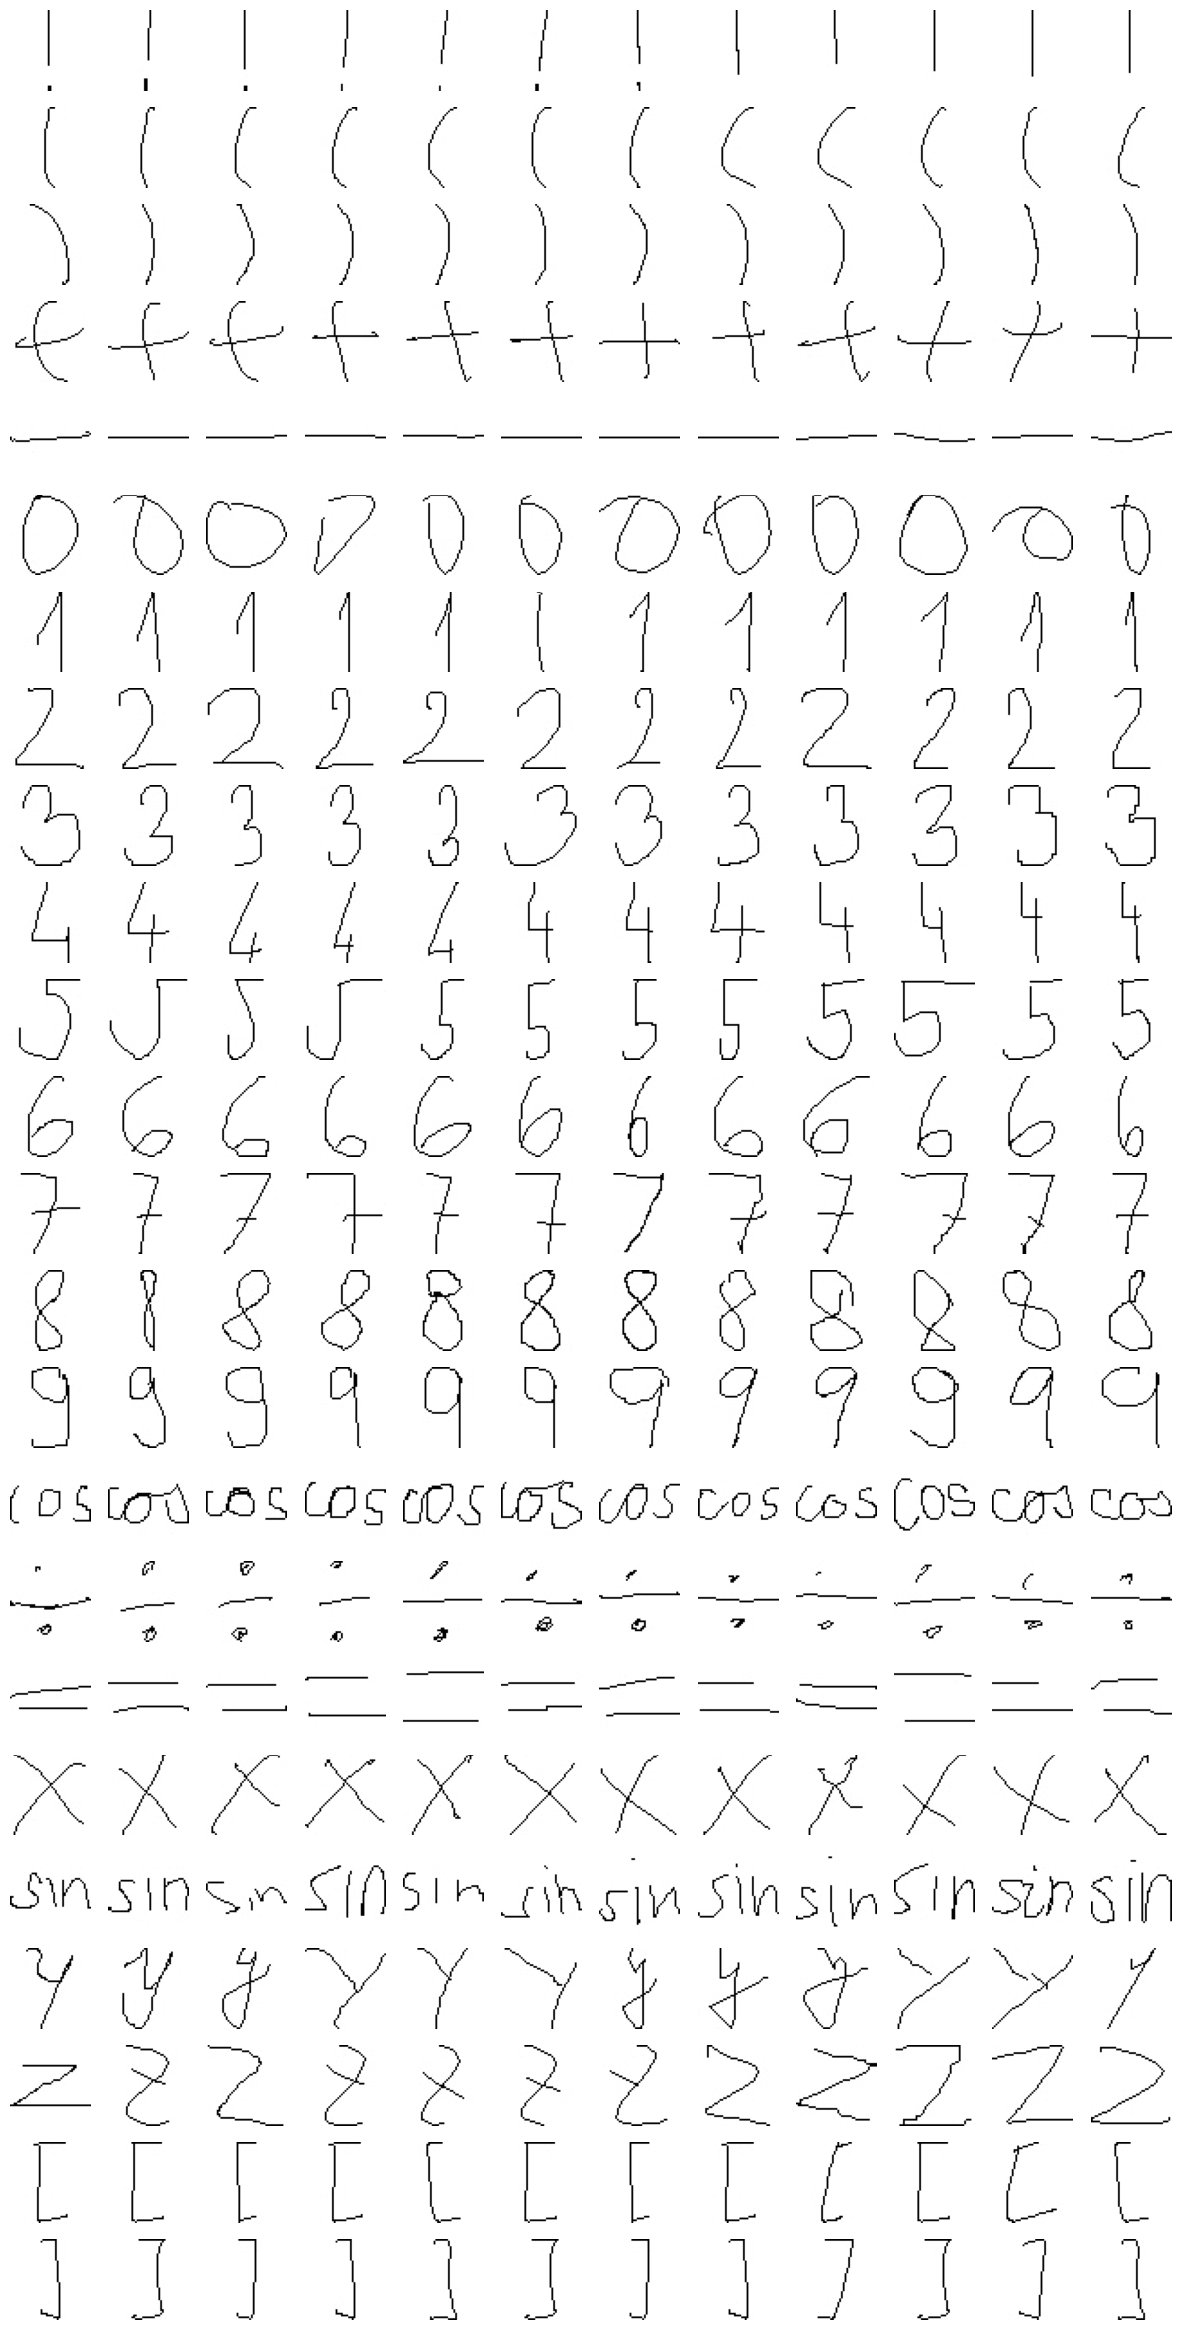

In [2]:
# Percorso della cartella principale
path = 'training/'

# Otteniamo una lista delle cartelle contenute nella cartella principale
folders = os.listdir(path)

# Creiamo una griglia di immagini con dodici colonne e tante righe quante sono le cartelle
fig, axs = plt.subplots(len(folders), 12, figsize=(15, 30))

# Cicliamo attraverso le cartelle e mostriamo le prime dodici immagini di ogni cartella
for i, folder in enumerate(folders):
    folder_path = os.path.join(path, folder)
    # Otteniamo una lista di tutte le immagini nella cartella
    images = os.listdir(folder_path)
    # Mostriamo solo le prime due immagini
    for j in range(12):
        image_path = os.path.join(folder_path, images[j])
        image = plt.imread(image_path)
        # Mostriamo l'immagine nella griglia
        axs[i, j].imshow(image, cmap = "gray")
        axs[i, j].axis('off')

# Mostriamo la griglia di immagini
plt.show()


C:\Users\Emanuele\AppData\Local\Temp\ipykernel_24504\341519843.py:33: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.library['seaborn-darkgrid']


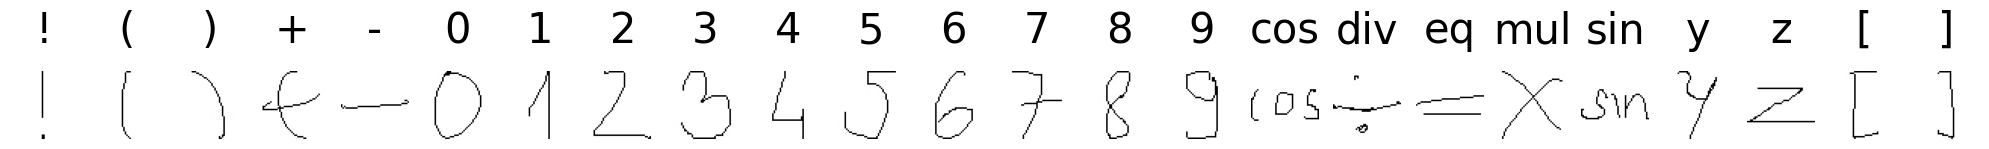

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Definiamo la cartella contenente le immagini
folder_path = "training/"

# Otteniamo la lista delle sottocartelle all'interno della cartella principale
subfolders = os.listdir(folder_path)

# Definiamo la dimensione del grafico
fig, axs = plt.subplots(nrows=1, ncols=len(subfolders), figsize=(20, 20))

fig.subplots_adjust(top=50)


# Per ogni sottocartella, aggiungiamo una colonna al grafico
for i, subfolder in enumerate(subfolders):
    # Otteniamo il primo file di immagine presente nella cartella
    image_path = os.path.join(folder_path, subfolder)
    image_file = os.listdir(image_path)[0]
    image_full_path = os.path.join(image_path, image_file)
    
    # Carichiamo l'immagine e la aggiungiamo alla colonna corrispondente del grafico
    img = mpimg.imread(image_full_path)
    axs[i].imshow(img, cmap="gray")
    axs[i].axis("off")
    axs[i].set_title(subfolder, fontsize=30, y=1.30)
    #axs[i].set_aspect('equal', adjustable='box')


# Visualizziamo il grafico
plt.style.library['seaborn-darkgrid']
plt.tight_layout()
plt.show()


# Definizione della funzione per il caricamento del dataset

Stampiamo tutte le cartelle del nostro dataset.

In [3]:
# Definiamo i percorsi del dataset
training_path = "training/"
test_path = "test/"

# Creiamo una lista contenente i nomi delle cartelle del dataset
folders = [folder for folder in os.listdir(training_path)]
lunghezze_train =[len(os.listdir(training_path+folder)) for folder in os.listdir(training_path)]
lunghezze_test =[len(os.listdir(test_path+folder)) for folder in os.listdir(test_path)]

# Stampiamo la lista
print(f"Queste sono le cartelle contenute nel dataset:\n{folders}")
print("lunghezze train:",lunghezze_train)
print("lunghezze test:",lunghezze_test)


Queste sono le cartelle contenute nel dataset:
['!', '(', ')', '+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'cos', 'div', 'eq', 'mul', 'sin', 'y', 'z', '[', ']']
lunghezze train: [1120, 1398, 13950, 15836, 10638, 1571, 26007, 25394, 10369, 6919, 2916, 2578, 2396, 2582, 3224, 2473, 571, 12626, 2693, 3915, 8854, 5303, 589, 564]
lunghezze test: [180, 378, 405, 423, 342, 324, 513, 747, 540, 477, 585, 540, 513, 486, 513, 513, 297, 478, 558, 378, 486, 567, 189, 216]


Definiamo una funzione che presa una cartella contenete immagini che rappresentano un elemento di un'espressione ne effettua un preprocessing in modo tale che le immagini siano standardizzate per poi poter essere lette dal modello.

In [4]:
print("Definisco una funzione per caricare le immagini...")

def load_images(folder, max_num_elems = 1500):
    
    loaded_list = []
    num_elems = 0

    # Per ogni immagine contenuta nelle cartelle
    for filename in os.listdir(folder):
        num_elems += 1
        if num_elems > max_num_elems:
            break
        
        # Carichiamo l'immagine con OpenCV
        image = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        image = ~image

        # Effettuiamo delle operazioni di preprocessing
        if image is not None:
            ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
            im_resize = cv2.resize(thresh, (32, 32))
            im_resize = np.reshape(im_resize, (1024, 1))
            #controllo meglio-peggio
            ret, im_resize = cv2.threshold(im_resize, 1, 255, cv2.THRESH_BINARY)
            loaded_list.append(im_resize)

    return loaded_list

print("Fatto")

Definisco una funzione per caricare le immagini...
Fatto


Provo a caricare e stampare degli elementi contenuti nella cartella "+" con la funzione precedentemente utilizzata.

C:\Users\Emanuele\AppData\Local\Temp\ipykernel_22656\3181604814.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.library['seaborn-darkgrid']


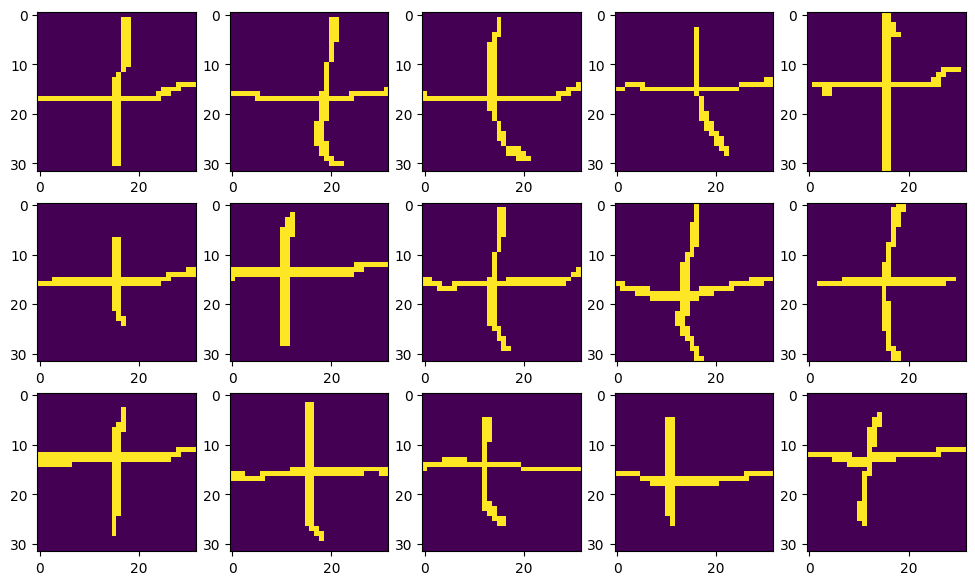

In [5]:
# Carichiamo le immagini dalla cartella "test/+"
images_list = load_images("test/+", max_num_elems=15)

# Effettuiamo il reshape delle immagini
fin_list = [image.reshape(32, 32, 1) for image in images_list]

# Visualizziamo le immagini
fig, axs = plt.subplots(3, 5, figsize=(12, 7))
axs = axs.flatten()
for img, ax in zip(fin_list, axs):
    ax.imshow(img)
plt.style.library['seaborn-darkgrid']

#plt.style.use("seaborn-v0_8-darkgrid")

plt.show()


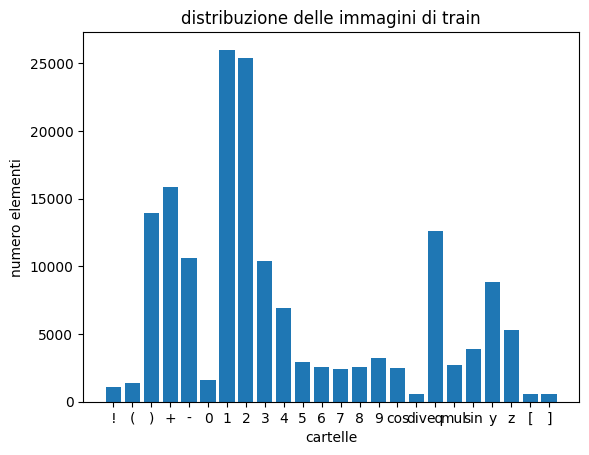

In [6]:
import matplotlib.pyplot as plt

x_axis = folders
y_axis = lunghezze_train



plt.bar(x_axis, y_axis)
plt.title('distribuzione delle immagini di train')
plt.xlabel('cartelle')
plt.ylabel('numero elementi')
image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'myimage.svg'
plt.savefig("distribuzione.svg", format=image_format, dpi=1200)
plt.show()




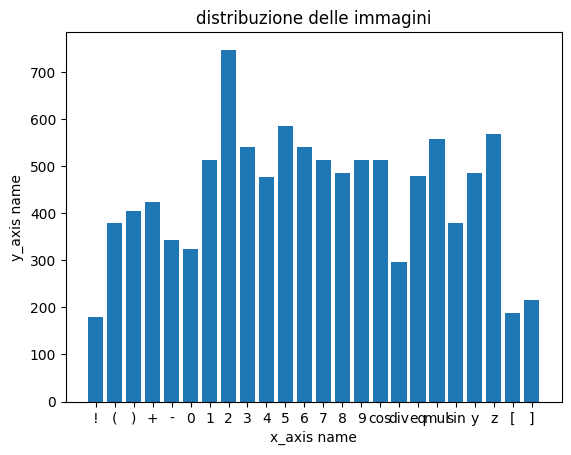

In [7]:
import matplotlib.pyplot as plt

x_axis = folders
y_axis = lunghezze_test

plt.bar(x_axis, y_axis)
plt.title('distribuzione delle immagini')
plt.xlabel('x_axis name')
plt.ylabel('y_axis name')
plt.show()

Creo un dizionario in cui mappo ogni simbolo matematico ad numero univoco che lo rappresenta

In [8]:
# Definiamo una mappa tra {Cartella -> Etichetta}
label_map = {
    "0": "0",
    "1": "1",
    "2": "2",
    "3": "3",
    "4": "4",
    "5": "5",
    "6": "6",
    "7": "7",
    "8": "8",
    "9": "9",
    "+": "10",
    "-": "11",
    "mul": "12",
    "div": "13",
    "eq": "14",
    "y": "15",
    "z": "16",
    "(": "17",
    ")": "18",
    "!": "19",
    "sin": "20",
    "cos": "21",
    "[": "22",
    "]": "23"
}

"""diz = {}
folders = [folder for folder in os.listdir(training_path)]
for folder,i in enumerate(folders):
    diz[i] = folder

print(diz)"""


'diz = {}\nfolders = [folder for folder in os.listdir(training_path)]\nfor folder,i in enumerate(folders):\n    diz[i] = folder\n\nprint(diz)'

In [12]:
labels = [key for key in diz]
print(labels)

NameError: name 'diz' is not defined

# Definizione della funzione per l'aggiunta delle etichette

In [9]:
def addlabels(path):
    # Inizializiamo l'array
    labeledarray = np.empty((0, 1025))

    # Scorriamo in ogni cartella
    for folder in os.listdir(path):
        print(f"Sto lavorando con la cartella {folder}")

        data = load_images(os.path.join(path, folder))

        label = label_map.get(folder)
        
        # Aggiungiamo ad ogni immagine, in ultima posizione, la label corrispondente
        for i in range(len(data)):
            data[i] = np.append(data[i], [label])

        # Concateniamo, all'array finale, "data"
        labeledarray = np.concatenate((labeledarray, data))
        print(f"L'array di train contiene: {len(labeledarray)} elementi\n")
    
    print("Ho terminato di lavorare")    

    return labeledarray

In [10]:
# Utilizziamo la funzione addlabels(path) sul training-set
train = addlabels(training_path)
# Trasformiamo l'array in un dataframe di Pandas
df = pd.DataFrame(train, index=None)
# Salviamo il dataframe
df.to_csv('train.csv', index=False)

Sto lavorando con la cartella !
L'array di train contiene: 1120 elementi

Sto lavorando con la cartella (
L'array di train contiene: 2518 elementi

Sto lavorando con la cartella )
L'array di train contiene: 4018 elementi

Sto lavorando con la cartella +
L'array di train contiene: 5518 elementi

Sto lavorando con la cartella -
L'array di train contiene: 7018 elementi

Sto lavorando con la cartella 0
L'array di train contiene: 8518 elementi

Sto lavorando con la cartella 1
L'array di train contiene: 10018 elementi

Sto lavorando con la cartella 2
L'array di train contiene: 11518 elementi

Sto lavorando con la cartella 3
L'array di train contiene: 13018 elementi

Sto lavorando con la cartella 4
L'array di train contiene: 14518 elementi

Sto lavorando con la cartella 5
L'array di train contiene: 16018 elementi

Sto lavorando con la cartella 6
L'array di train contiene: 17518 elementi

Sto lavorando con la cartella 7
L'array di train contiene: 19018 elementi

Sto lavorando con la cartella 8

Salvo il l'array di training in un file

In [11]:
# Utilizziamo la funzione addlabels(path) sul training-set
test = addlabels(test_path)
# Trasformiamo l'array in un dataframe di Pandas
df = pd.DataFrame(test, index=None)
# Salviamo il dataframe
df.to_csv('test.csv', index=False)

Sto lavorando con la cartella !
L'array di train contiene: 180 elementi

Sto lavorando con la cartella (
L'array di train contiene: 558 elementi

Sto lavorando con la cartella )
L'array di train contiene: 963 elementi

Sto lavorando con la cartella +
L'array di train contiene: 1386 elementi

Sto lavorando con la cartella -
L'array di train contiene: 1728 elementi

Sto lavorando con la cartella 0
L'array di train contiene: 2052 elementi

Sto lavorando con la cartella 1
L'array di train contiene: 2565 elementi

Sto lavorando con la cartella 2
L'array di train contiene: 3312 elementi

Sto lavorando con la cartella 3
L'array di train contiene: 3852 elementi

Sto lavorando con la cartella 4
L'array di train contiene: 4329 elementi

Sto lavorando con la cartella 5
L'array di train contiene: 4914 elementi

Sto lavorando con la cartella 6
L'array di train contiene: 5454 elementi

Sto lavorando con la cartella 7
L'array di train contiene: 5967 elementi

Sto lavorando con la cartella 8
L'array d